In [38]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [39]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [40]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [41]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [44]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
scaler.fit(df_market_data)

# Scale the data
scaled_data = scaler.transform(df_market_data)

# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(scaled_data, columns=df_market_data.columns, index=df_market_data.index)

# Display the DataFrame with scaled data
df_market_data_scaled.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


In [51]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv("Resources/crypto_market_data.csv")

# Create a copy of 'coin_id'
df_market_data['coin_id_copy'] = df_market_data['coin_id']

# Set 'coin_id' as index
df_market_data.set_index('coin_id', inplace=True)

# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(scaled_data, columns=df_market_data.drop(columns=['coin_id_copy']).columns, index=df_market_data.index)

# Copy the crypto names from the original data
df_market_data_scaled['coin_id_copy'] = df_market_data['coin_id_copy']

# Set the 'coin_id_copy' column as index
df_market_data_scaled.set_index('coin_id_copy', inplace=True)

# Display sample data
df_market_data_scaled.head(10)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id_copy,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Data.

In [52]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Print the list
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [54]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    
    # Fit the model to the data using `df_market_data_scaled`
    model.fit(df_market_data_scaled)
    
    # Append the model.inertia_ to the inertia list
    inertia.append(model.inertia_)

# Print the inertia values
print(inertia)


[287.0, 198.5718180979813, 123.19048183836958, 79.02243535120975, 65.302379141625, 52.10180599356482, 46.03525005555019, 37.284806594046614, 32.161417101072416, 28.07525267789887, 23.890044355377952]


In [55]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,123.190482
3,4,79.022435
4,5,65.302379
5,6,52.101806
6,7,46.035250
7,8,37.284807
8,9,32.161417
9,10,28.075253


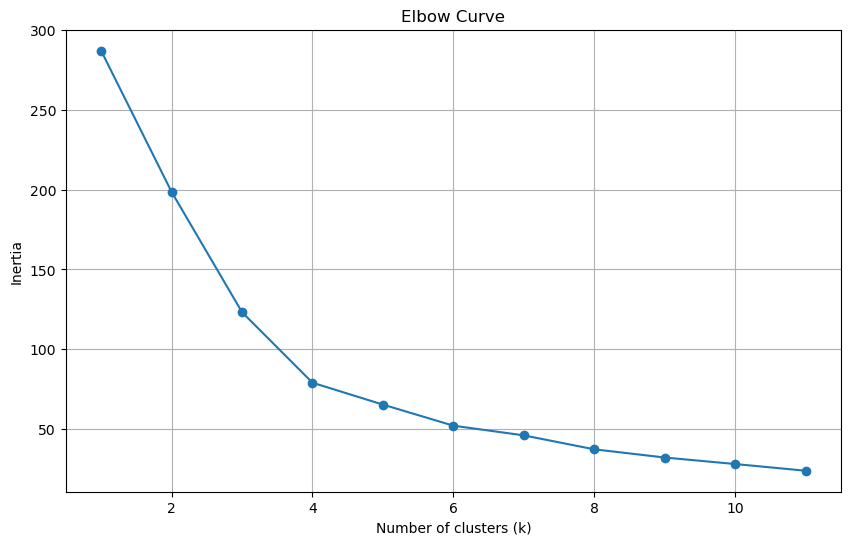

In [56]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot a line chart with all the inertia values computed with the different values of k
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The ‘elbow’ in the graph occurs at k=4. This is where the inertia starts to decrease more slowly, indicating that adding more clusters beyond this point does not significantly improve the model. Therefore, the optimal number of clusters for the dataset would be 4.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [57]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)

In [58]:
# Fit the K-Means model using the scaled data
model.fit(df_market_data_scaled)

/Users/davidskaff/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=0)

In [59]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predicted_clusters = model.predict(df_market_data_scaled)

# Print the resulting array of cluster values
predicted_clusters

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0],
      dtype=int32)

In [60]:
# Create a copy of the DataFrame
df_market_data_scaled_copy = df_market_data_scaled.copy()

In [61]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data_scaled_copy['predicted_cluster'] = predicted_clusters

# Display sample data
df_market_data_scaled_copy.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted_cluster
coin_id_copy,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,2
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,2
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,2
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,2


In [62]:
# Create a scatter plot using hvPlot
scatter_plot = df_market_data_scaled_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    hover_cols="coin_id",
    by="predicted_cluster",
)

scatter_plot

:NdOverlay   [predicted_cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

---

### Optimize Clusters with Principal Component Analysis.

In [63]:
# Create a PCA model instance and set `n_components=3`
pca = PCA(n_components=3)

In [64]:
# Use the PCA model with `fit_transform` to reduce to three principal components
pca_data = pca.fit_transform(df_market_data_scaled)

# Create a DataFrame with the PCA data
df_pca = pd.DataFrame(
    data=pca_data,
    columns=["principal component 1", "principal component 2", "principal component 3"],
    index=df_market_data_scaled.index
)

# View the first five rows of the DataFrame
df_pca.head(5)

,principal component 1,principal component 2,principal component 3
coin_id_copy,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [65]:
# Retrieve the explained variance
explained_variance = pca.explained_variance_ratio_

# Print the explained variance
print(f"Explained Variance: {explained_variance}")

Explained Variance: [0.3719856  0.34700813 0.17603793]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Total Explained Variance = 0.3719856 + 0.34700813 + 0.17603793 = 0.89503166

In [66]:
# Create a new DataFrame with the PCA data
df_pca = pd.DataFrame(
    data=pca_data,
    columns=["principal component 1", "principal component 2", "principal component 3"],
    index=df_market_data_scaled.index
)

# Copy the crypto names from the original data
df_pca['coin_id'] = df_market_data_scaled.index

# Set the 'coin_id' column as index
df_pca.set_index('coin_id', inplace=True)

# Display sample data
df_pca.head(10)

,principal component 1,principal component 2,principal component 3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


---

### Find the Best Value for k Using the PCA Data

In [67]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Print the list
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [68]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    
    # Fit the model to the data using `df_market_data_pca`
    model.fit(df_pca)
    
    # Append the model.inertia_ to the inertia list
    inertia.append(model.inertia_)

# Print the inertia values
print(inertia)

[256.8740855678926, 168.81189630685233, 93.77462568057297, 49.66549665179738, 37.839465986812456, 27.720626194899815, 21.182775862957335, 17.016962140077432, 13.66832488366406, 10.484890485976926, 7.984354811896223]


In [69]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {'k': k_values, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)

# Display the DataFrame
df_elbow_pca

,k,inertia
0,1,256.874086
1,2,168.811896
2,3,93.774626
3,4,49.665497
4,5,37.839466
5,6,27.720626
6,7,21.182776
7,8,17.016962
8,9,13.668325
9,10,10.484890


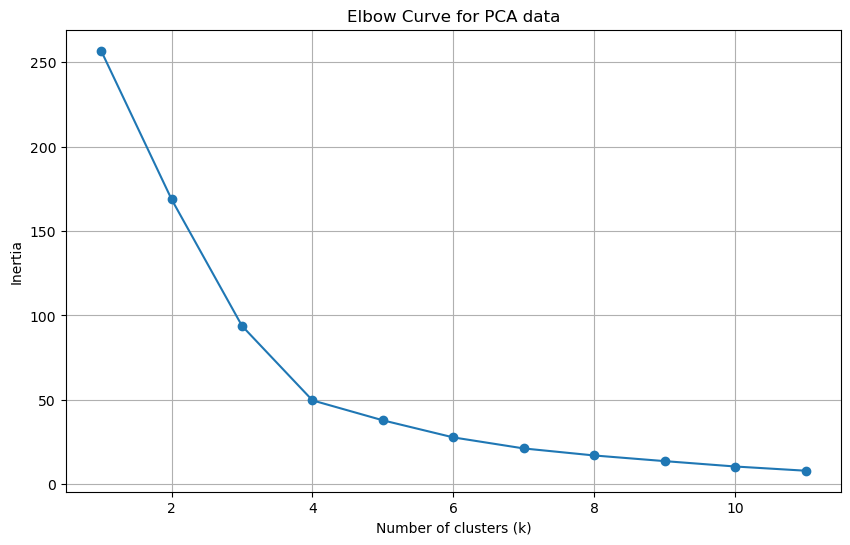

In [70]:
# Plot a line chart with all the inertia values computed with the different values of k
plt.figure(figsize=(10, 6))
plt.plot(df_elbow_pca['k'], df_elbow_pca['inertia'], marker='o')
plt.title('Elbow Curve for PCA data')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [72]:
# Initialize the K-Means model using the best value for k
model_pca = KMeans(n_clusters=4, random_state=0)

In [73]:
# Fit the K-Means model using the PCA data
model_pca.fit(df_pca)

/Users/davidskaff/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=0)

In [75]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predicted_clusters_pca = model_pca.predict(df_pca)

# Print the resulting array of cluster values
predicted_clusters_pca

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0],
      dtype=int32)

In [76]:
# Create a copy of the DataFrame with the PCA data
df_pca_copy = df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_copy['predicted_cluster'] = predicted_clusters_pca

# Display sample data
df_pca_copy.head(10)

,principal component 1,principal component 2,principal component 3,predicted_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2
binancecoin,-0.516534,1.388377,0.804071,2
chainlink,-0.450711,0.517699,2.846143,2
cardano,-0.345600,0.729439,1.478013,2
litecoin,-0.649468,0.432165,0.600303,2


In [77]:
# Create a scatter plot using hvPlot
scatter_plot_pca = df_pca_copy.hvplot.scatter(
    x="principal component 1",
    y="principal component 2",
    hover_cols="coin_id",
    by="predicted_cluster",
)

# Display the plot
scatter_plot_pca

:NdOverlay   [predicted_cluster]
   :Scatter   [principal component 1]   (principal component 2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

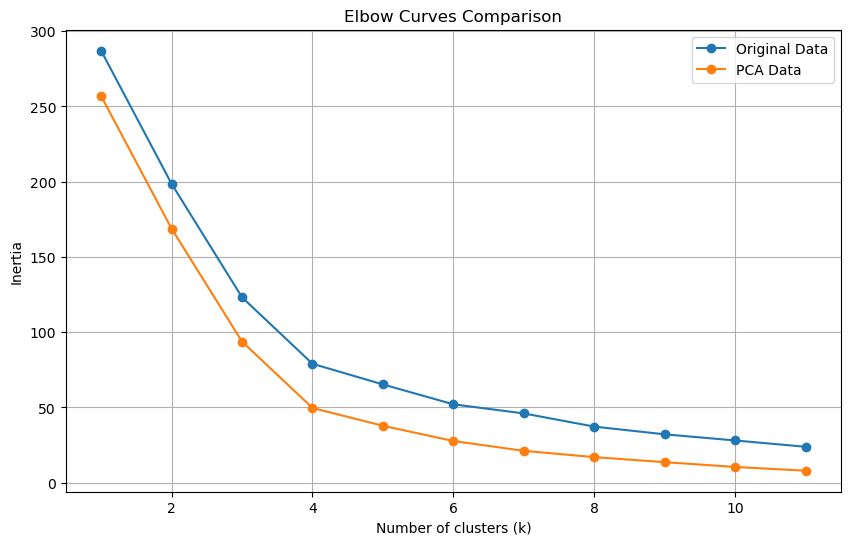

In [78]:
# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the Elbow curve for the original data
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o', label='Original Data')

# Plot the Elbow curve for the PCA data
plt.plot(df_elbow_pca['k'], df_elbow_pca['inertia'], marker='o', label='PCA Data')

# Add title and labels
plt.title('Elbow Curves Comparison')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')

# Add a legend
plt.legend()

# Show grid
plt.grid(True)

# Display the plot
plt.show()

In [79]:
# Import hvplot.pandas
import hvplot.pandas

# Create a new figure
fig = plt.figure(figsize=(10, 6))

# Create a scatter plot for the original data
scatter_plot = df_market_data_scaled_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    hover_cols="coin_id",
    by="predicted_cluster",
).opts(title='Clusters for Original Data')

# Create a scatter plot for the PCA data
scatter_plot_pca = df_pca_copy.hvplot.scatter(
    x="principal component 1",
    y="principal component 2",
    hover_cols="coin_id",
    by="predicted_cluster",
).opts(title='Clusters for PCA Data')

# Display the plots side by side
(scatter_plot + scatter_plot_pca).cols(1)

:Layout
   .NdOverlay.I  :NdOverlay   [predicted_cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)
   .NdOverlay.II :NdOverlay   [predicted_cluster]
      :Scatter   [principal component 1]   (principal component 2,coin_id)

<Figure size 1000x600 with 0 Axes>

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** We used Principal Component Analysis (PCA) to reduce the dimensionality of cryptocurrency market data and performed K-Means clustering on both the original and PCA-transformed data. By comparing the clustering results, we can assess the impact of feature reduction. If the clusters are similar, PCA retained essential information; if different, important information might have been lost.